# CREATE DEEP NEURAL NETWORK

In [94]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import L2

from os.path import join
from os import listdir
from shutil import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# GLOBAL VARIABLES
preprocessingPath="secondStep_preprocessingData"
path = "data"
classes = listdir(preprocessingPath)
trainPath = join(path,"train")
valPath = join(path,"val")
train = 0.80 # ;val = 1. - train
np.random.seed(26)


batch_size = 8
epochs = 128
lr = 1e-4
input_shape = (224,224)
channels = (1,)
class_mode = 'categorical'
color_mode = 'grayscale'
num_class = len(classes)

## Mount files to data generators

In [28]:
# ## SEPARATING TO TRAIN AND VALIDATION SETS
# for c in classes:
#     classPath = join(preprocessingPath,c)
#     images = listdir(classPath)
#     np.random.shuffle(images)
#     numImages = len(images)
#     setClassPath = join(trainPath,c)
#     for n,image in enumerate(images):
#         if n == round(numImages*train): 
#             setClassPath = join(valPath,c)
#         imagePath = join(classPath,image)
#         newImagePath = join(setClassPath,image)
#         copy(imagePath, newImagePath)

In [63]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #  width_shift_range = 0.1,
                                    #  height_shift_range = 0.1, 
                                    #  zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                    #  rotation_range = 30,
                                     ).flow_from_directory(directory = trainPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

val_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory = valPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

Found 839 images belonging to 4 classes.
Found 210 images belonging to 4 classes.


## CREATE MODEL

In [95]:
model = Sequential()
model.add(Input(input_shape+channels))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu', kernel_regularizer=L2()))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu', kernel_regularizer=L2()))
model.add(Dropout(0.5))
# model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_class, activation='softmax'))



In [96]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 50176)             0         
                                                                 
 dropout_20 (Dropout)        (None, 50176)             0         
                                                                 
 dense_42 (Dense)            (None, 1024)              51381248  
                                                                 
 dropout_21 (Dropout)        (None, 1024)              0         
                                                                 
 dense_43 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_44 (Dense)            (None, 4)               

In [97]:
model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['acc'])

In [98]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=4, min_lr=1e-7)
es = EarlyStopping(monitor='loss', patience=7)

history = model.fit(train_generator, validation_data = val_generator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/128
105/105 [==============================] - 2s 15ms/step - loss: 25.8485 - acc: 0.3135 - val_loss: 22.9017 - val_acc: 0.2857 - lr: 1.0000e-04
Epoch 2/128
105/105 [==============================] - 2s 14ms/step - loss: 21.0485 - acc: 0.3635 - val_loss: 19.2130 - val_acc: 0.4048 - lr: 1.0000e-04
Epoch 3/128
105/105 [==============================] - 2s 14ms/step - loss: 17.8557 - acc: 0.3719 - val_loss: 16.4158 - val_acc: 0.3476 - lr: 1.0000e-04
Epoch 4/128
105/105 [==============================] - 2s 14ms/step - loss: 15.2478 - acc: 0.3897 - val_loss: 14.1029 - val_acc: 0.3905 - lr: 1.0000e-04
Epoch 5/128
105/105 [==============================] - 2s 14ms/step - loss: 13.1752 - acc: 0.4231 - val_loss: 12.2426 - val_acc: 0.4238 - lr: 1.0000e-04
Epoch 6/128
105/105 [==============================] - 2s 14ms/step - loss: 11.4794 - acc: 0.4029 - val_loss: 10.7569 - val_acc: 0.3857 - lr: 1.0000e-04
Epoch 7/128
105/105 [==============================] - 2s 14ms/step - loss: 10.061

## PLOT RESULTS

In [99]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

best_epoch = np.argmax(np.array(val_acc))

print("Best Epoch: ", best_epoch)
print("Final Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Final Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Final Train Accuracy: {:.4f}".format(train_acc[best_epoch]))
print("Final Test Accuracy: {:.4f}".format(val_acc[best_epoch]))

Best Epoch:  103
Final Train Loss: 1.0896
Final Validation Loss: 1.9654
Final Train Accuracy: 0.9714
Final Test Accuracy: 0.6143


In [100]:
import warnings
warnings.filterwarnings("ignore")

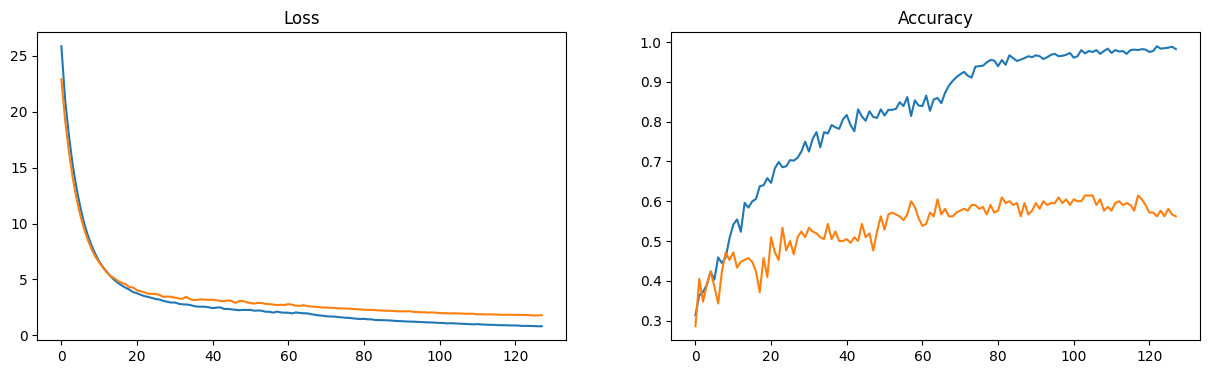

In [101]:

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.lineplot(train_loss , ax=ax[0], )
sns.lineplot(val_loss, ax=ax[0], )
# ax[0].legend(labels=['train loss','validation loss'],loc="upper right")
ax[0].set_title('Loss')

sns.lineplot(train_acc, ax=ax[1], )
sns.lineplot(val_acc, ax=ax[1], )
# ax[1].legend(labels=['train acc','validation acc'],loc="upper right")
ax[1].set_title('Accuracy')

plt.show()
